<h1 style="font-size:40px;">Análisis de Negocio</h1>

<h1 style="font-size:25px;">Introducción y desarrollo del proyecto:</h1>

La empresa Showz, dedicada a la venta de entradas para eventos, ha solicitado la optimización de sus inversiones en marketing digital. El objetivo principal de este análisis es evaluar el rendimiento de sus campañas publicitarias y el comportamiento de los usuarios en la plataforma, a fin de tomar decisiones estratégicas más efectivas y rentables.

El enfoque del análisis se basa en responder las siguientes preguntas clave:

¿Cómo utilizan los usuarios el sitio web de Showz?

¿Cuándo se convierten los visitantes en compradores?

¿Cuánto aporta financieramente cada cliente a la empresa?

¿En qué momento los ingresos generados compensan el costo de adquisición?

El análisis busca proporcionar una visión clara sobre el rendimiento de cada canal de marketing, permitiendo así una optimización de la inversión publicitaria basada en datos concretos.

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

<h1 style="font-size:25px;">Paso 1. Acceder a  los datos y prepárarlos para el análisis</h1>

<h1 style="font-size:15px;">Data frame 1 visitas al sitio web</h1>

In [59]:
df_visits = pd.read_csv('/datasets/visits_log_us.csv')
print(df_visits)

         Device               End Ts  Source Id             Start Ts  \
0         touch  2017-12-20 17:38:00          4  2017-12-20 17:20:00   
1       desktop  2018-02-19 17:21:00          2  2018-02-19 16:53:00   
2         touch  2017-07-01 01:54:00          5  2017-07-01 01:54:00   
3       desktop  2018-05-20 11:23:00          9  2018-05-20 10:59:00   
4       desktop  2017-12-27 14:06:00          3  2017-12-27 14:06:00   
...         ...                  ...        ...                  ...   
359395  desktop  2017-07-29 19:07:19          2  2017-07-29 19:07:00   
359396    touch  2018-01-25 17:38:19          1  2018-01-25 17:38:00   
359397  desktop  2018-03-03 10:12:19          4  2018-03-03 10:12:00   
359398  desktop  2017-11-02 10:12:19          5  2017-11-02 10:12:00   
359399    touch  2017-09-10 13:13:19          2  2017-09-10 13:13:00   

                         Uid  
0       16879256277535980062  
1         104060357244891740  
2        7459035603376831527  
3       161

In [60]:
print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB
None


In [61]:
print(df_visits.columns)

Index(['Device', 'End Ts', 'Source Id', 'Start Ts', 'Uid'], dtype='object')


In [62]:
df_visits['Start Ts'] = pd.to_datetime(df_visits['Start Ts'], format='%Y-%m-%d %H:%M:%S')
df_visits['End Ts'] = pd.to_datetime(df_visits['End Ts'], format='%Y-%m-%d %H:%M:%S')

print(df_visits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Device     359400 non-null  object        
 1   End Ts     359400 non-null  datetime64[ns]
 2   Source Id  359400 non-null  int64         
 3   Start Ts   359400 non-null  datetime64[ns]
 4   Uid        359400 non-null  uint64        
dtypes: datetime64[ns](2), int64(1), object(1), uint64(1)
memory usage: 13.7+ MB
None


In [63]:
print(df_visits.isna().sum())

Device       0
End Ts       0
Source Id    0
Start Ts     0
Uid          0
dtype: int64


In [64]:
print(df_visits.duplicated().sum())

0


<h1 style="font-size:15px;">Analisis de dataframes:</h1> 

Despues de explorar el primer data frame se cambiaron las columas "Start Ts" y "End Ts" de tipo object a tipo datetime ya que ambas columas contienen una fecha y hora. Las columnas Device, Source Id y Uid si coinciden con el tipo de dato correcto.

No se encontraron valores nulos ni duplicados.

<h1 style="font-size:15px;">Data frame 2 datos sobre pedidos</h1> 

In [65]:
df_orders = pd.read_csv('/datasets/orders_log_us.csv')
print(df_orders)

                    Buy Ts  Revenue                   Uid
0      2017-06-01 00:10:00    17.00  10329302124590727494
1      2017-06-01 00:25:00     0.55  11627257723692907447
2      2017-06-01 00:27:00     0.37  17903680561304213844
3      2017-06-01 00:29:00     0.55  16109239769442553005
4      2017-06-01 07:58:00     0.37  14200605875248379450
...                    ...      ...                   ...
50410  2018-05-31 23:50:00     4.64  12296626599487328624
50411  2018-05-31 23:50:00     5.80  11369640365507475976
50412  2018-05-31 23:54:00     0.30   1786462140797698849
50413  2018-05-31 23:56:00     3.67   3993697860786194247
50414  2018-06-01 00:02:00     3.42     83872787173869366

[50415 rows x 3 columns]


In [66]:
print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB
None


In [67]:
print(df_orders.columns)

Index(['Buy Ts', 'Revenue', 'Uid'], dtype='object')


In [68]:
df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'], format='%Y-%m-%d %H:%M:%S')

print(df_orders.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  datetime64[ns]
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
dtypes: datetime64[ns](1), float64(1), uint64(1)
memory usage: 1.2 MB
None


In [69]:
print(df_orders.isna().sum())

Buy Ts     0
Revenue    0
Uid        0
dtype: int64


In [70]:
print(df_orders.duplicated().sum())

0


Análisis:

Se cambió la columna "Buy Ts" de tipo object a "datatime" ya que contiene una fecha y una hora. Las columnas Revenue y Uid no fueron modificadas ya que coinciden con el tipo de dato correcto.

No se encontraron valores nulos ni duplicados.

<h1 style="font-size:15px;">Data frame 3 datos sobre gastos de marketing</h1> 

In [72]:
df_costs = pd.read_csv('/datasets/costs_us.csv')
print(df_costs)

      source_id          dt  costs
0             1  2017-06-01  75.20
1             1  2017-06-02  62.25
2             1  2017-06-03  36.53
3             1  2017-06-04  55.00
4             1  2017-06-05  57.08
...         ...         ...    ...
2537         10  2018-05-27   9.92
2538         10  2018-05-28  21.26
2539         10  2018-05-29  11.32
2540         10  2018-05-30  33.15
2541         10  2018-05-31  17.60

[2542 rows x 3 columns]


In [73]:
print(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB
None


In [74]:
print(df_costs.columns)

Index(['source_id', 'dt', 'costs'], dtype='object')


In [75]:
df_costs['dt'] = pd.to_datetime(df_costs['dt'], format='%Y-%m-%d')
print(df_costs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   source_id  2542 non-null   int64         
 1   dt         2542 non-null   datetime64[ns]
 2   costs      2542 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 59.7 KB
None


In [76]:
print(df_costs.isna().sum())

source_id    0
dt           0
costs        0
dtype: int64


In [77]:
print(df_costs.duplicated().sum())

0


Analisis:
    
En este tercer data frame se cambio la columna "dt" de tipo object a tipo datetime ya que incluye una fecha.
No se encontraron valores nulos ni duplicados.

<h1 style="font-size:25px;">Paso 2 Informes y calculo de métricas </h1> 

<h1 style="font-size:20px;">Visitas</h1> 

¿Cuántas personas lo usan cada día, semana y mes?

In [78]:
df_visits['date'] = df_visits['Start Ts'].dt.date
daily_visits = df_visits.groupby('date')['Uid'].nunique().reset_index(name='unique_users')

In [79]:
df_visits['week'] = df_visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
weekly_visits = df_visits.groupby('week')['Uid'].nunique().reset_index(name='unique_users')

In [80]:
df_visits['month'] = df_visits['Start Ts'].dt.to_period('M').dt.to_timestamp()
monthly_visits = df_visits.groupby('month')['Uid'].nunique().reset_index(name='unique_users')

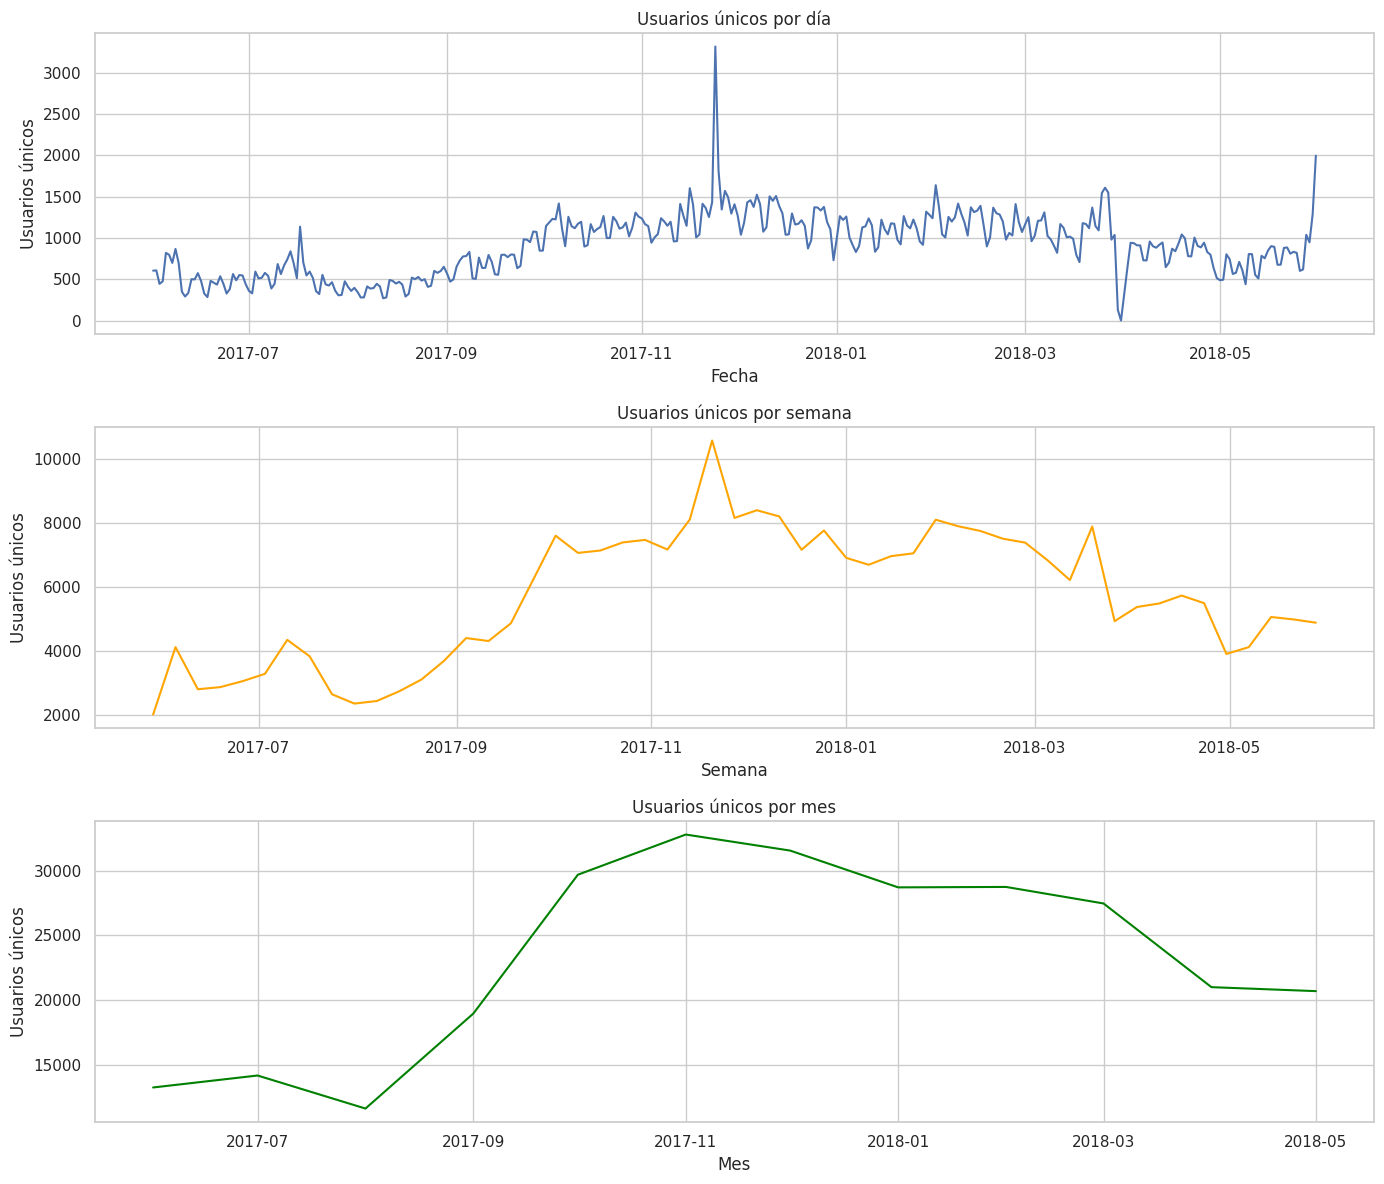

In [81]:
df_visits['date'] = df_visits['Start Ts'].dt.date
df_visits['week'] = df_visits['Start Ts'].dt.to_period('W').apply(lambda r: r.start_time)
df_visits['month'] = df_visits['Start Ts'].dt.to_period('M').dt.to_timestamp()


daily_visits = df_visits.groupby('date')['Uid'].nunique().reset_index(name='unique_users')
weekly_visits = df_visits.groupby('week')['Uid'].nunique().reset_index(name='unique_users')
monthly_visits = df_visits.groupby('month')['Uid'].nunique().reset_index(name='unique_users')


sns.set(style='whitegrid')


fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=False)


sns.lineplot(data=daily_visits, x='date', y='unique_users', ax=axs[0])
axs[0].set_title('Usuarios únicos por día')
axs[0].set_xlabel('Fecha')
axs[0].set_ylabel('Usuarios únicos')


sns.lineplot(data=weekly_visits, x='week', y='unique_users', ax=axs[1], color='orange')
axs[1].set_title('Usuarios únicos por semana')
axs[1].set_xlabel('Semana')
axs[1].set_ylabel('Usuarios únicos')


sns.lineplot(data=monthly_visits, x='month', y='unique_users', ax=axs[2], color='green')
axs[2].set_title('Usuarios únicos por mes')
axs[2].set_xlabel('Mes')
axs[2].set_ylabel('Usuarios únicos')

plt.tight_layout()
plt.show()

¿Cuántas sesiones hay por día? (Un usuario puede tener más de una sesión)

In [84]:
df_visits['date'] = df_visits['Start Ts'].dt.date


sessions_per_day = df_visits.groupby('date').size().reset_index(name='sessions')


print(sessions_per_day.head(10))

         date  sessions
0  2017-06-01       664
1  2017-06-02       658
2  2017-06-03       477
3  2017-06-04       510
4  2017-06-05       893
5  2017-06-06       875
6  2017-06-07       788
7  2017-06-08       939
8  2017-06-09       755
9  2017-06-10       375


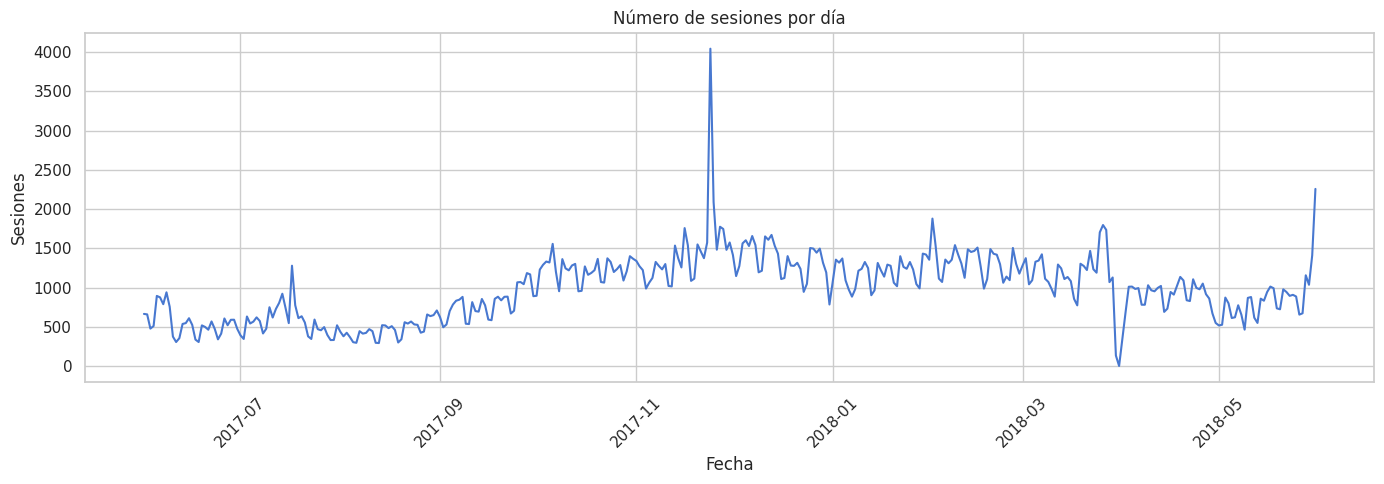

In [83]:
sns.set(style='whitegrid', palette='muted')
plt.figure(figsize=(14, 5))
sns.lineplot(data=sessions_per_day, x='date', y='sessions')
plt.title('Número de sesiones por día')
plt.xlabel('Fecha')
plt.ylabel('Sesiones')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Cuál es la duración de cada sesión?

In [85]:
df_visits['session_duration_sec'] = (df_visits['End Ts'] - df_visits['Start Ts']).dt.total_seconds()


df_visits['session_duration_min'] = df_visits['session_duration_sec'] / 60


print(df_visits[['Uid', 'Start Ts', 'End Ts', 'session_duration_sec', 'session_duration_min']].head())

                    Uid            Start Ts              End Ts  \
0  16879256277535980062 2017-12-20 17:20:00 2017-12-20 17:38:00   
1    104060357244891740 2018-02-19 16:53:00 2018-02-19 17:21:00   
2   7459035603376831527 2017-07-01 01:54:00 2017-07-01 01:54:00   
3  16174680259334210214 2018-05-20 10:59:00 2018-05-20 11:23:00   
4   9969694820036681168 2017-12-27 14:06:00 2017-12-27 14:06:00   

   session_duration_sec  session_duration_min  
0                1080.0                  18.0  
1                1680.0                  28.0  
2                   0.0                   0.0  
3                1440.0                  24.0  
4                   0.0                   0.0  


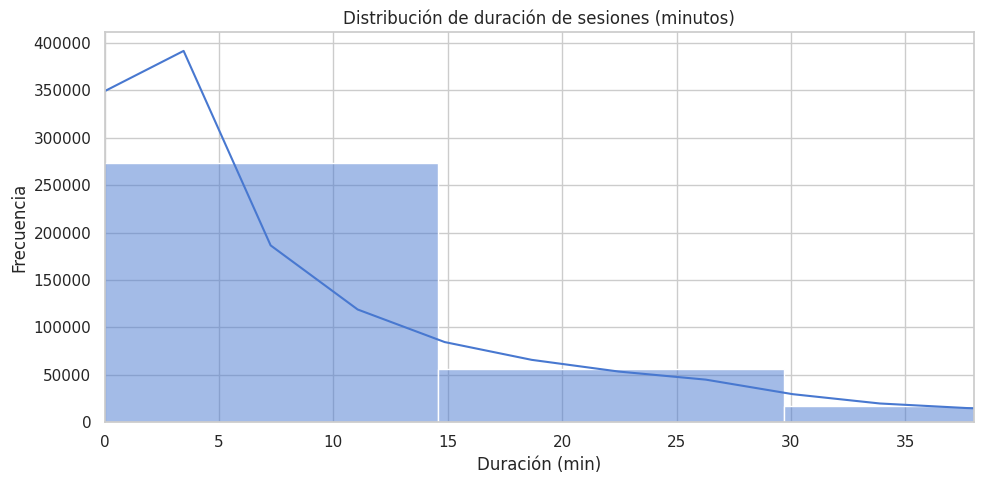

In [86]:
plt.figure(figsize=(10, 5))
sns.histplot(df_visits['session_duration_min'], bins=50, kde=True)
plt.title('Distribución de duración de sesiones (minutos)')
plt.xlabel('Duración (min)')
plt.ylabel('Frecuencia')
plt.xlim(0, df_visits['session_duration_min'].quantile(0.95))  
plt.tight_layout()
plt.show()

¿Con qué frecuencia los usuarios regresan?

In [87]:
df_visits_sorted = df_visits.sort_values(by=['Uid', 'Start Ts'])


df_visits_sorted['prev_session'] = df_visits_sorted.groupby('Uid')['Start Ts'].shift(1)
df_visits_sorted['days_since_last'] = (df_visits_sorted['Start Ts'] - df_visits_sorted['prev_session']).dt.days

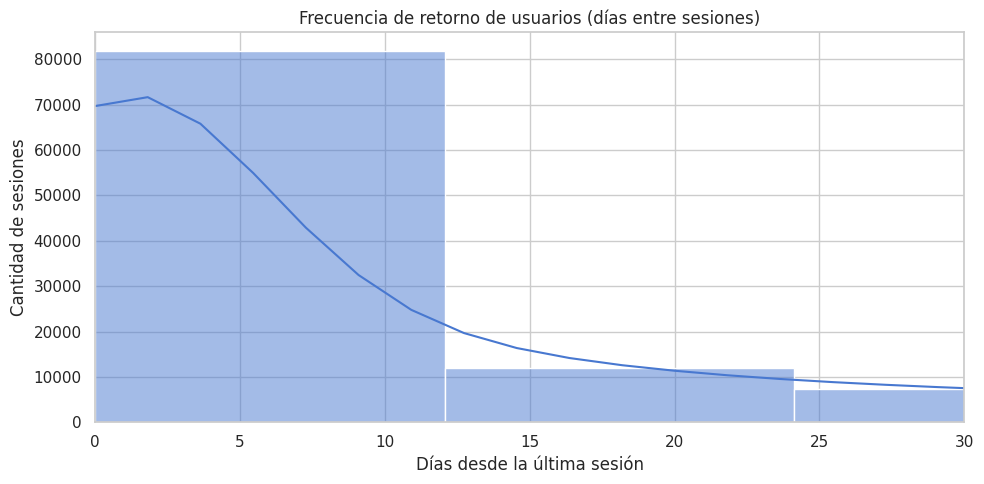

In [29]:
plt.figure(figsize=(10, 5))
sns.histplot(df_visits_sorted['days_since_last'].dropna(), bins=30, kde=True)
plt.title('Frecuencia de retorno de usuarios (días entre sesiones)')
plt.xlabel('Días desde la última sesión')
plt.ylabel('Cantidad de sesiones')
plt.xlim(0, 30)  
plt.tight_layout()
plt.show()

In [88]:
avg_return_per_user = df_visits_sorted.groupby('Uid')['days_since_last'].mean().dropna().reset_index(name='avg_days_between_sessions')
print(avg_return_per_user.head())

                Uid  avg_days_between_sessions
0   313578113262317                  86.500000
1   325320750514679                 148.000000
2   526778907996220                  55.666667
3   577434573913691                   6.000000
4  1260655184775459                  43.000000


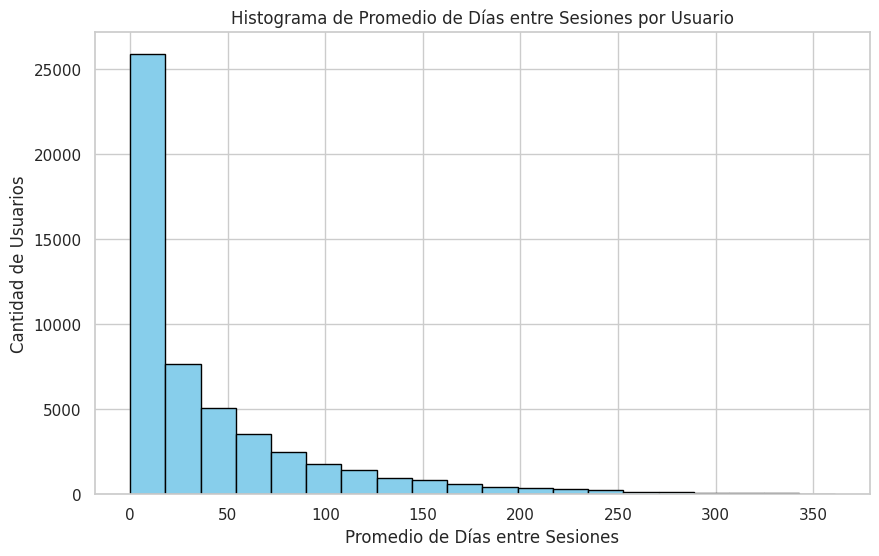

In [89]:
plt.figure(figsize=(10, 6))
plt.hist(avg_return_per_user['avg_days_between_sessions'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histograma de Promedio de Días entre Sesiones por Usuario')
plt.xlabel('Promedio de Días entre Sesiones')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.show()

<h1 style="font-size:15px;">Analisis de las visitas:</h1> 

Al analizar la graficas anteriores se puede notar que en promedio la mayor parte de los usuarios analizados (400,000) tardan en promedio una duracion de 4 minutos dentro de la plataforma, teniendo una diferencia considerable con el minuto 5 en donde solo 310,000 siguen perteneciendo en el servidor de  Showz. Tambien se puede notar que el numero de usuarios que permanece dentro de la plataforma va decreciendo de forma constante mientras avanzan los minutos, teniendo solo 140,000 usuarios a los 10 minutos, 90,00 mil al minuto 15 y 60,000 al minuto 20.

Ademas de que el número de sesiones es mayor al número de usuarios, indicando que algunos usuarios regresan múltiples veces al día.

En cuanto a la frecuencia de retorno se notan 3 aspectos principales como lo son que el mayor retorno dentro de los primeros 2 días, que 72,000 usuarios regresan con esa frecuencia y que el comportamiento muestra un patrón de rápido abandono si no convierten pronto.



<h1 style="font-size:20px;">Ventas</h1> 

¿Cuándo empieza la gente a comprar? (En el análisis de KPI, generalmente nos interesa saber el tiempo que transcurre entre el registro y la conversión, es decir, cuando el usuario se convierte en cliente)

In [90]:
first_visits = df_visits.groupby('Uid').agg({'Start Ts': 'min', 'Source Id': 'first'}).reset_index()
first_visits.columns = ['Uid', 'first_visit', 'Source Id']


first_orders = df_orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']


conversion_delay = pd.merge(first_visits, first_orders, on='Uid', how='inner')
conversion_delay['conversion_delay_days'] = (conversion_delay['first_order'] - conversion_delay['first_visit']).dt.days

In [91]:
def classify_conversion_days(days):
    if days == 0:
        return 'Conversion 0d'
    elif 1 <= days <= 3:
        return 'Conversion 1-3d'
    elif 4 <= days <= 7:
        return 'Conversion 4-7d'
    else:
        return 'Conversion >7d'

conversion_delay['conversion_group'] = conversion_delay['conversion_delay_days'].apply(classify_conversion_days)

In [92]:
pivot_grouped = conversion_delay.pivot_table(
    index='Source Id',
    columns='conversion_group',
    values='Uid',
    aggfunc='count',
    fill_value=0
)

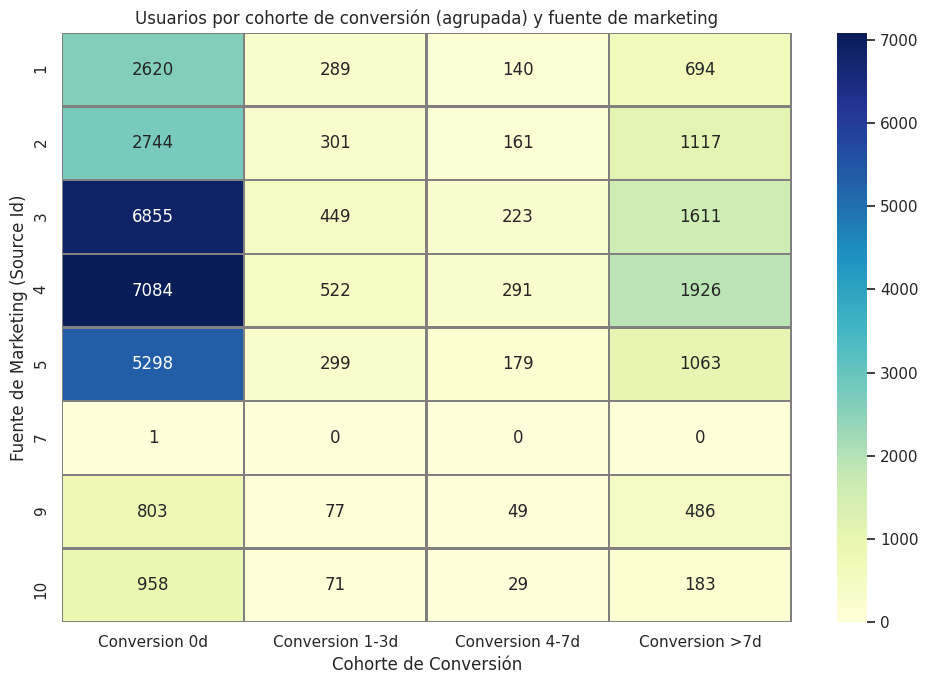

In [93]:
plt.figure(figsize=(10, 7))
plt.title('Usuarios por cohorte de conversión (agrupada) y fuente de marketing')
sns.heatmap(
    pivot_grouped,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray',
    cmap='YlGnBu'
)
plt.xlabel('Cohorte de Conversión')
plt.ylabel('Fuente de Marketing (Source Id)')
plt.tight_layout()
plt.show()

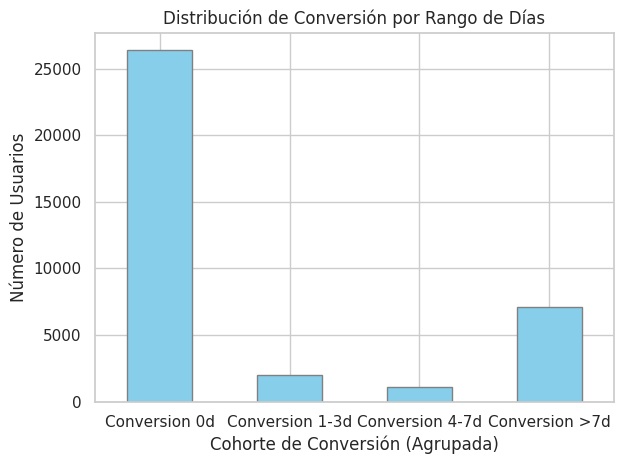

In [94]:
grouped_distribution = conversion_delay['conversion_group'].value_counts().reindex([
    'Conversion 0d', 'Conversion 1-3d', 'Conversion 4-7d', 'Conversion >7d'
])

grouped_distribution.plot(kind='bar', color='skyblue', edgecolor='gray')

plt.title('Distribución de Conversión por Rango de Días')
plt.xlabel('Cohorte de Conversión (Agrupada)')
plt.ylabel('Número de Usuarios')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [95]:
first_orders = df_orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']


df_user_journey = pd.merge(first_visits, first_orders, on='Uid', how='inner')


df_user_journey['conversion_days'] = (df_user_journey['first_order'] - df_user_journey['first_visit']).dt.days


df_user_journey_filtered = df_user_journey[df_user_journey['conversion_days'] < 10]


conversion_counts = (
    df_user_journey_filtered['conversion_days']
    .value_counts()
    .sort_index()
    .reset_index()
)
conversion_counts.columns = ['days_to_conversion', 'user_count']


print(conversion_counts)

   days_to_conversion  user_count
0                   0       26363
1                   1        1011
2                   2         563
3                   3         434
4                   4         324
5                   5         270
6                   6         260
7                   7         218
8                   8         189
9                   9         140


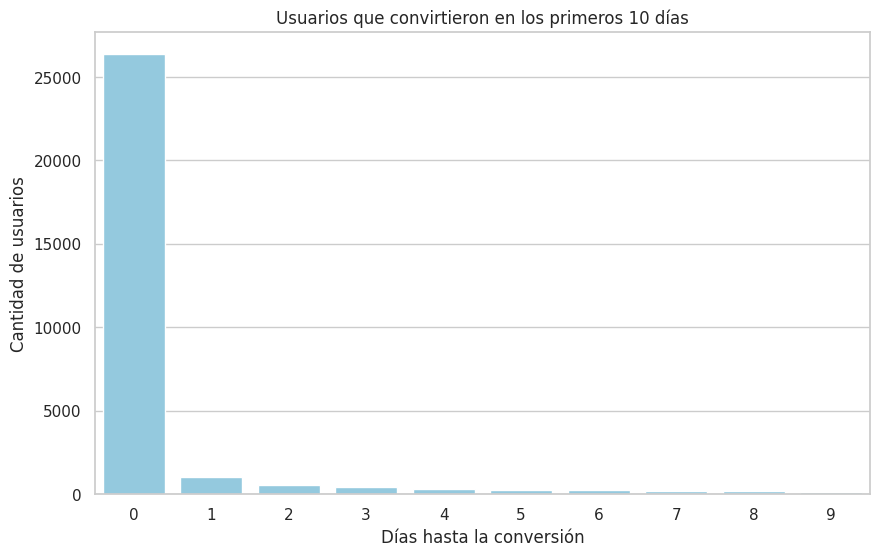

In [40]:
plt.figure(figsize=(10,6))
sns.barplot(data=conversion_counts, x='days_to_conversion', y='user_count', color='skyblue')
plt.title('Usuarios que convirtieron en los primeros 10 días')
plt.xlabel('Días hasta la conversión')
plt.ylabel('Cantidad de usuarios')
plt.xticks(range(10))
plt.show()

In [96]:
first_visits = df_visits.groupby('Uid').agg({'Start Ts': 'min', 'Source Id': 'first'}).reset_index()
first_visits.columns = ['Uid', 'first_visit', 'source_id']


first_orders = df_orders.groupby('Uid')['Buy Ts'].min().reset_index()
first_orders.columns = ['Uid', 'first_order']


df_user_journey = pd.merge(first_visits, first_orders, on='Uid', how='inner')


df_user_journey['conversion_days'] = (df_user_journey['first_order'] - df_user_journey['first_visit']).dt.days


df_user_journey_filtered = df_user_journey[df_user_journey['conversion_days'] < 10]


cohort_counts = (
    df_user_journey_filtered
    .groupby(['source_id', 'conversion_days'])['Uid']
    .nunique()
    .reset_index()
)

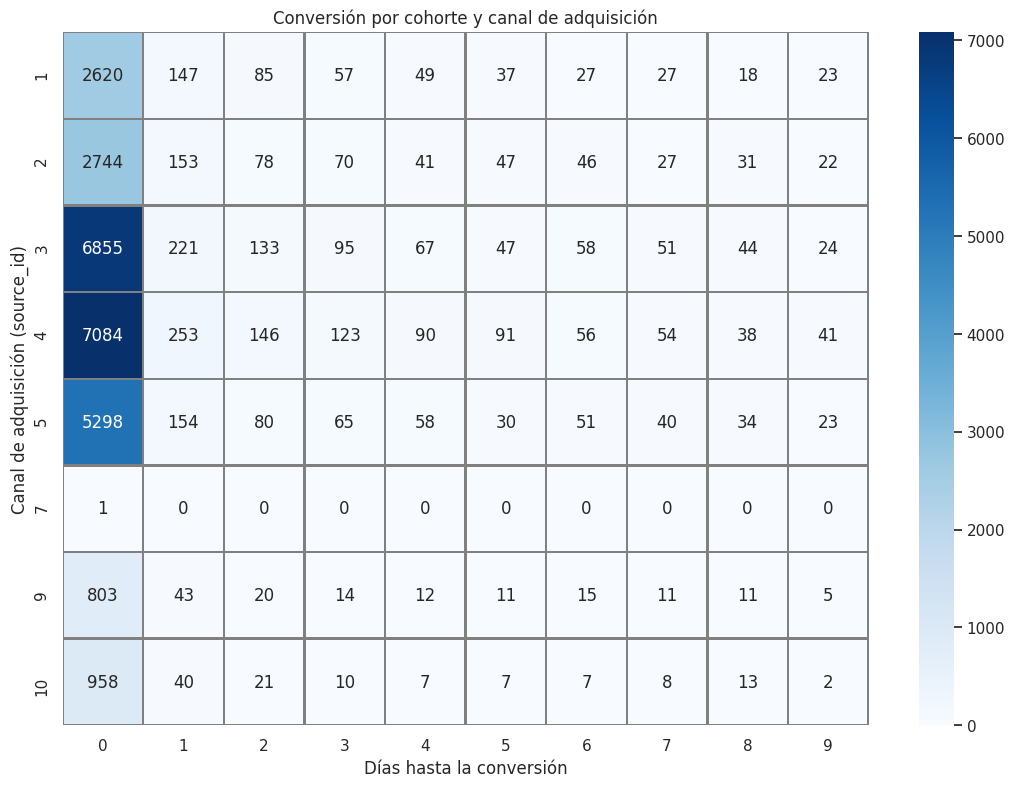

In [97]:
heatmap_data = cohort_counts.pivot(index='source_id', columns='conversion_days', values='Uid').fillna(0)

plt.figure(figsize=(13, 9))
plt.title('Conversión por cohorte y canal de adquisición')
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.0f',
    linewidths=1,
    linecolor='gray',
    cmap='Blues'
)
plt.xlabel('Días hasta la conversión')
plt.ylabel('Canal de adquisición (source_id)')
plt.show()

¿Cuántos pedidos hacen durante un período de tiempo dado?

In [98]:
orders_per_week = df_orders.groupby(df_orders['Buy Ts'].dt.to_period('W').apply(lambda r: r.start_time)).size().reset_index(name='orders')

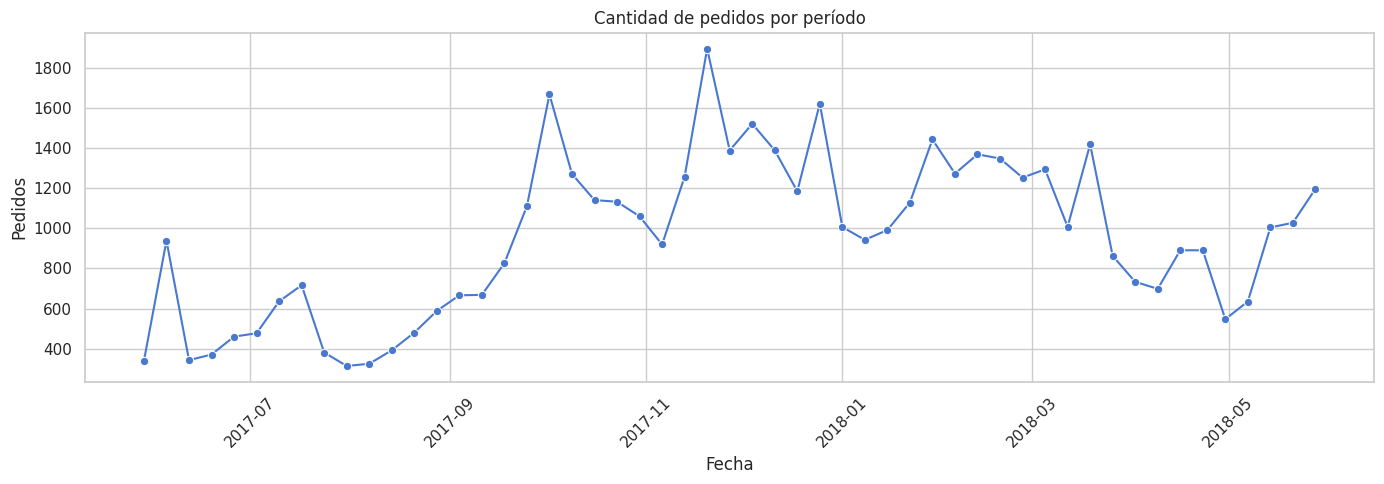

In [99]:
data = orders_per_week  

plt.figure(figsize=(14, 5))
sns.lineplot(data=data, x=data.columns[0], y='orders', marker='o')
plt.title('Cantidad de pedidos por período')
plt.xlabel('Fecha')
plt.ylabel('Pedidos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Cuál es el tamaño promedio de compra? 

In [100]:
df_orders['Revenue'] = pd.to_numeric(df_orders['Revenue'], errors='coerce')


average_order_value = df_orders['Revenue'].mean()
print(f"Tamaño promedio de compra: ${average_order_value:.2f}")


df_orders['Buy Ts'] = pd.to_datetime(df_orders['Buy Ts'])


df_orders['Month'] = df_orders['Buy Ts'].dt.to_period('M')


monthly_avg_order = df_orders.groupby('Month')['Revenue'].mean().reset_index()
monthly_avg_order['Month'] = monthly_avg_order['Month'].astype(str)

Tamaño promedio de compra: $5.00


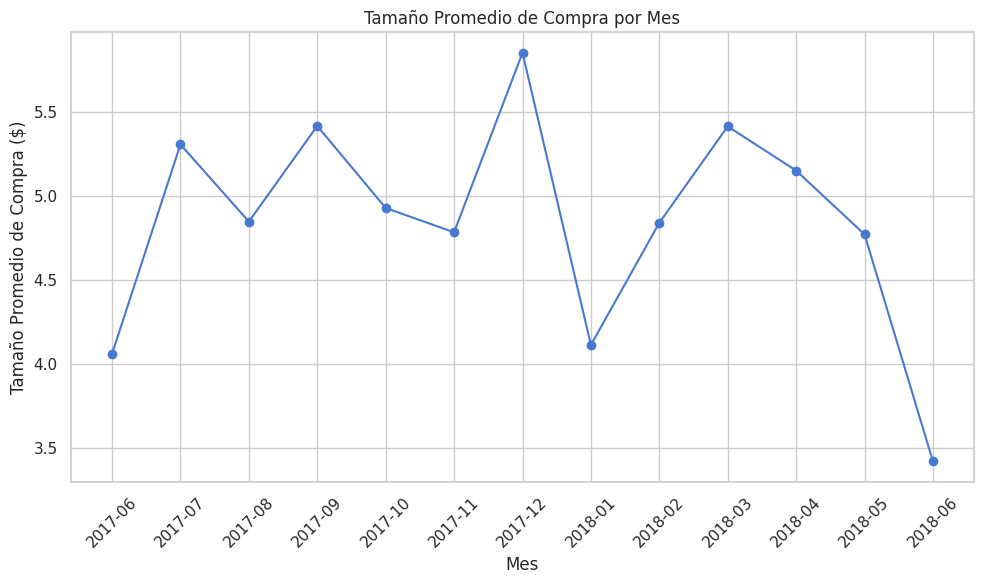

In [101]:
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_order['Month'], monthly_avg_order['Revenue'], marker='o', linestyle='-')
plt.title('Tamaño Promedio de Compra por Mes')
plt.xlabel('Mes')
plt.ylabel('Tamaño Promedio de Compra ($)')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

¿Cuánto dinero traen? (LTV)

In [103]:
total_revenue = df_orders['Revenue'].sum()
unique_buyers = df_orders['Uid'].nunique()


ltv_avg = total_revenue / unique_buyers

print(f"LTV promedio: ${ltv_avg:.2f}")

LTV promedio: $6.90


In [104]:
df_merged = pd.merge(df_orders, df_visits[['Uid', 'Source Id']], on='Uid', how='left')


ltv_by_source = df_merged.groupby('Source Id').agg(
    total_revenue=('Revenue', 'sum'),
    num_users=('Uid', 'nunique')
)
ltv_by_source['LTV'] = ltv_by_source['total_revenue'] / ltv_by_source['num_users']
ltv_by_source = ltv_by_source.reset_index()


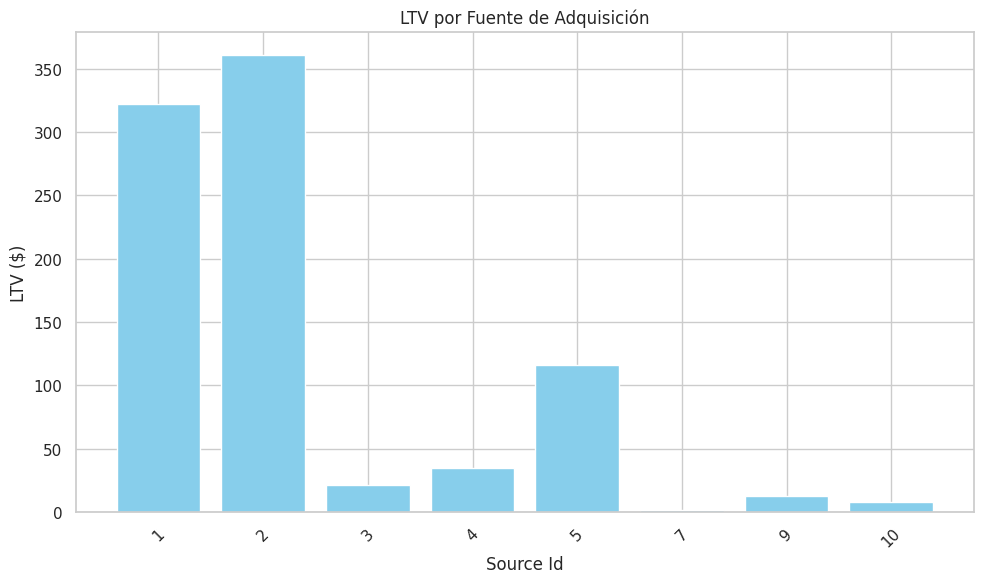

In [105]:
plt.figure(figsize=(10, 6))
plt.bar(ltv_by_source['Source Id'].astype(str), ltv_by_source['LTV'], color='skyblue')
plt.title('LTV por Fuente de Adquisición')
plt.xlabel('Source Id')
plt.ylabel('LTV ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Analisis de ventas:</h1>  
    
Al observar las tablas de analisis de datos se puede observar que 26,363 usuarios convierten el mismo día (Conversion 0d), mientras que en el segundo coherte de 1–3 días adicionales solo 2,000 usuarios y baja drasticamente a partir del el 4to día, la conversión cae drásticamente.

Por otra parte tambien se observa que el nmero de pedidos fuctúan semanalmente, pero se mantiene un volumen constante habiendo mayor numero de venntas en el trimestre de noviembre a enero. 

el tamaño promedio de compra es de Tamaño promedio de compra: $5.00 y que el Valor del tiempo de vida del cliente (LTV)varia vría según canal, por ejemplo el surce ID 1 tiene LTV muy alto comparado con su CAC.



<h1 style="font-size:20px;">Marketing </h1> 

 ¿Cuánto dinero se gastó?  (Total/por fuente de adquisición/a lo largo del tiempo)

In [106]:
df_costs['costs'] = pd.to_numeric(df_costs['costs'], errors='coerce')


df_costs_clean = df_costs.dropna(subset=['costs'])


total_cost = df_costs_clean['costs'].sum()

print(f"Gasto total en marketing: ${total_cost:.2f}")

Gasto total en marketing: $329131.62


In [107]:
cost_by_source = df_costs_clean.groupby('source_id')['costs'].sum().reset_index()


print(cost_by_source.sort_values(by='costs', ascending=False))

   source_id      costs
2          3  141321.63
3          4   61073.60
4          5   51757.10
1          2   42806.04
0          1   20833.27
6         10    5822.49
5          9    5517.49


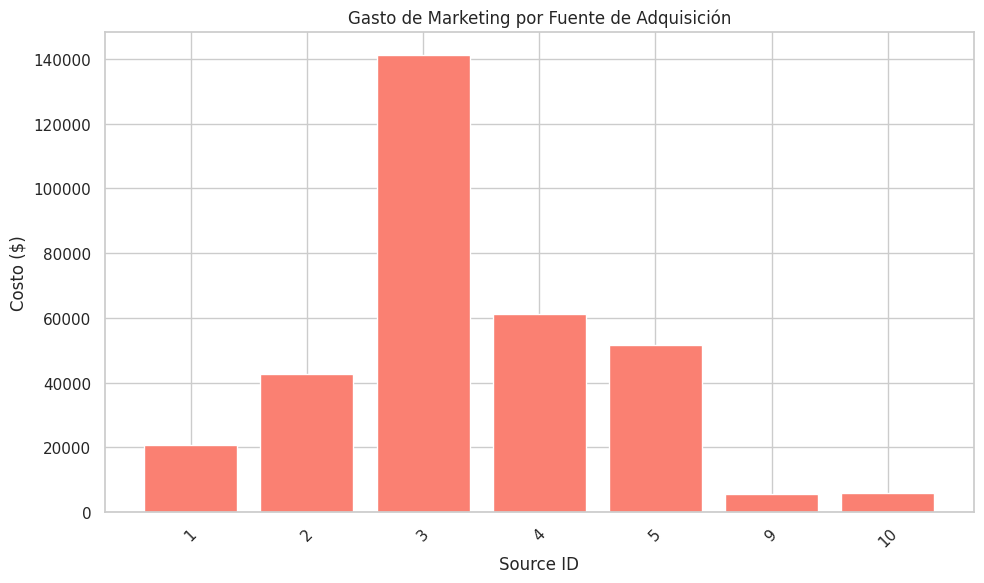

In [108]:
plt.figure(figsize=(10,6))
plt.bar(cost_by_source['source_id'].astype(str), cost_by_source['costs'], color='salmon')
plt.title('Gasto de Marketing por Fuente de Adquisición')
plt.xlabel('Source ID')
plt.ylabel('Costo ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

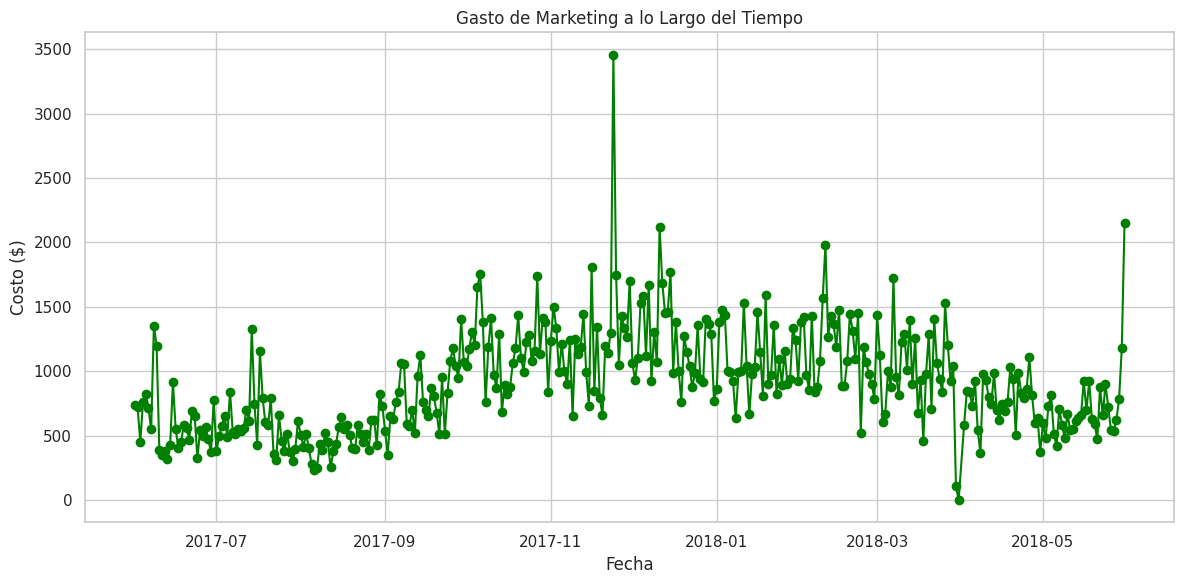

In [109]:
cost_by_date = df_costs_clean.groupby('dt')['costs'].sum().reset_index()


plt.figure(figsize=(12,6))
plt.plot(cost_by_date['dt'], cost_by_date['costs'], marker='o', linestyle='-', color='green')
plt.title('Gasto de Marketing a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Costo ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

¿Cuál fue el costo de adquisición de clientes de cada una de las fuentes?

In [110]:
buyers = df_orders['Uid'].unique()


buyers_sources = df_visits[df_visits['Uid'].isin(buyers)][['Uid', 'Source Id']].drop_duplicates()


buyers_per_source = buyers_sources.groupby('Source Id')['Uid'].nunique().reset_index()
buyers_per_source.columns = ['source_id', 'buyers']


costs_per_source = df_costs.groupby('source_id')['costs'].sum().reset_index()


cac = pd.merge(costs_per_source, buyers_per_source, on='source_id', how='left')


cac['buyers'] = cac['buyers'].fillna(0)


cac['CAC'] = cac['costs'] / cac['buyers']
cac.replace([float('inf'), float('nan')], 0, inplace=True)


print(cac.sort_values(by='CAC', ascending=False))

   source_id      costs  buyers        CAC
2          3  141321.63   13846  10.206676
1          2   42806.04    7305   5.859828
4          5   51757.10   10156   5.096209
3          4   61073.60   14253   4.284965
6         10    5822.49    1773   3.283976
0          1   20833.27    7138   2.918642
5          9    5517.49    2793   1.975471


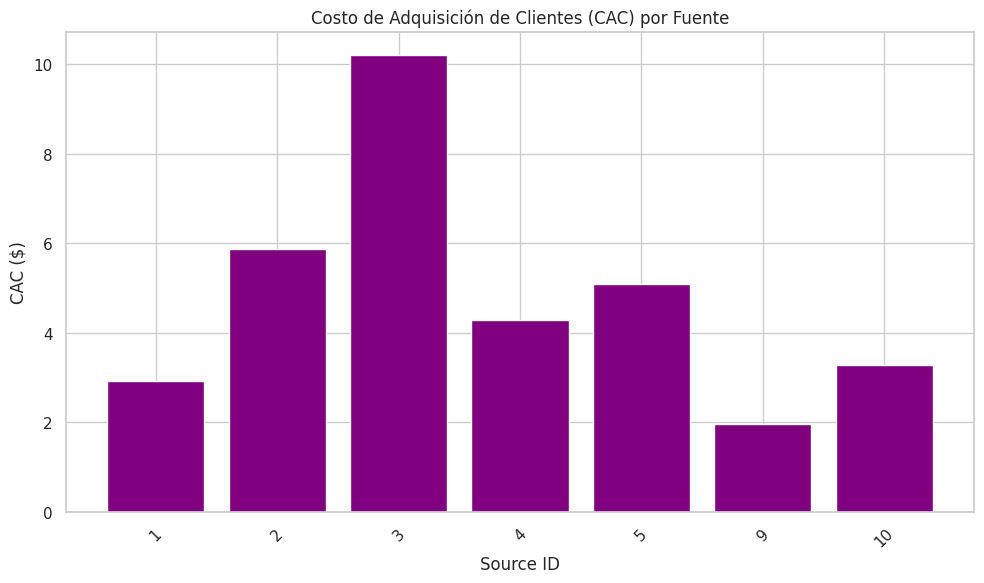

In [53]:
plt.figure(figsize=(10,6))
plt.bar(cac['source_id'].astype(str), cac['CAC'], color='purple')
plt.title('Costo de Adquisición de Clientes (CAC) por Fuente')
plt.xlabel('Source ID')
plt.ylabel('CAC ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [111]:
costs_per_source = df_costs.groupby('source_id')['costs'].sum().reset_index()


users_per_source = df_visits.groupby('Source Id')['Uid'].nunique().reset_index()
users_per_source.columns = ['source_id', 'unique_users']


cac_all_users = pd.merge(costs_per_source, users_per_source, on='source_id', how='left')


cac_all_users['CAC'] = cac_all_users['costs'] / cac_all_users['unique_users']
cac_all_users.replace([float('inf'), float('nan')], 0, inplace=True)


print(cac_all_users.sort_values(by='CAC', ascending=False))

   source_id      costs  unique_users       CAC
2          3  141321.63         74756  1.890439
1          2   42806.04         26245  1.631017
0          1   20833.27         18999  1.096546
4          5   51757.10         56974  0.908434
3          4   61073.60         83525  0.731201
6         10    5822.49          8067  0.721766
5          9    5517.49          9264  0.595584


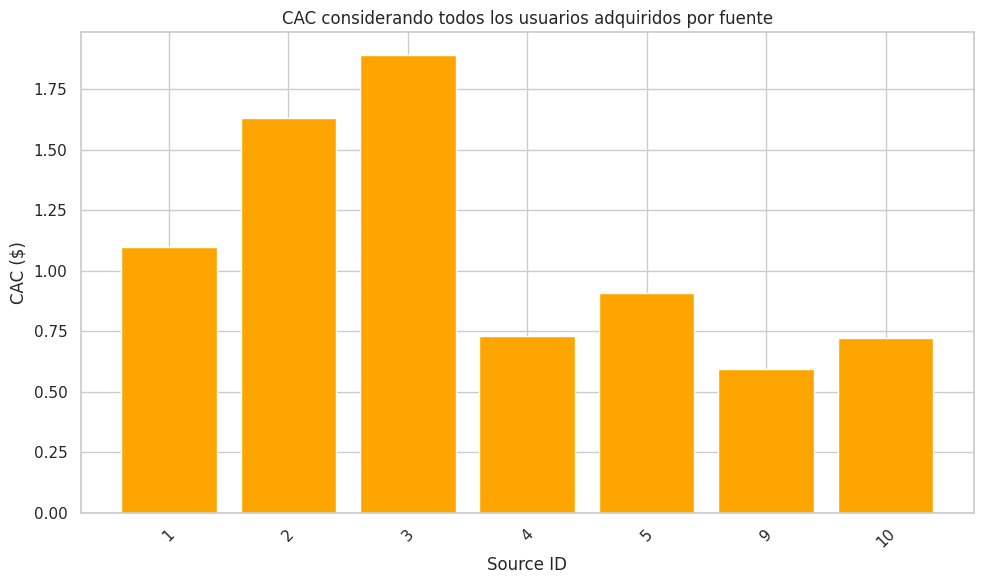

In [112]:
plt.figure(figsize=(10,6))
plt.bar(cac_all_users['source_id'].astype(str), cac_all_users['CAC'], color='orange')
plt.title('CAC considerando todos los usuarios adquiridos por fuente')
plt.xlabel('Source ID')
plt.ylabel('CAC ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

¿Cuán rentables eran las inversiones? (ROMI)

In [114]:
df_orders['Revenue'] = pd.to_numeric(df_orders['Revenue'], errors='coerce')

df_orders_visits = pd.merge(df_orders, df_visits[['Uid', 'Source Id']], on='Uid', how='left')


revenue_by_source = df_orders_visits.groupby('Source Id')['Revenue'].sum().reset_index()
revenue_by_source.columns = ['source_id', 'total_revenue']


cost_by_source = df_costs.groupby('source_id')['costs'].sum().reset_index()


romi = pd.merge(revenue_by_source, cost_by_source, on='source_id', how='outer').fillna(0)


romi['ROMI'] = ((romi['total_revenue'] - romi['costs']) / romi['costs']) * 100
romi.replace([float('inf'), float('nan')], 0, inplace=True)


print(romi.sort_values(by='ROMI', ascending=False))

   source_id  total_revenue      costs          ROMI
0          1   2.298200e+06   20833.27  10931.394351
1          2   2.638189e+06   42806.04   6063.123732
4          5   1.181477e+06   51757.10   2182.734427
3          4   4.966902e+05   61073.60    713.264930
6          9   3.634225e+04    5517.49    558.673600
7         10   1.461923e+04    5822.49    151.082097
2          3   2.966880e+05  141321.63    109.938111
5          7   1.220000e+00       0.00      0.000000


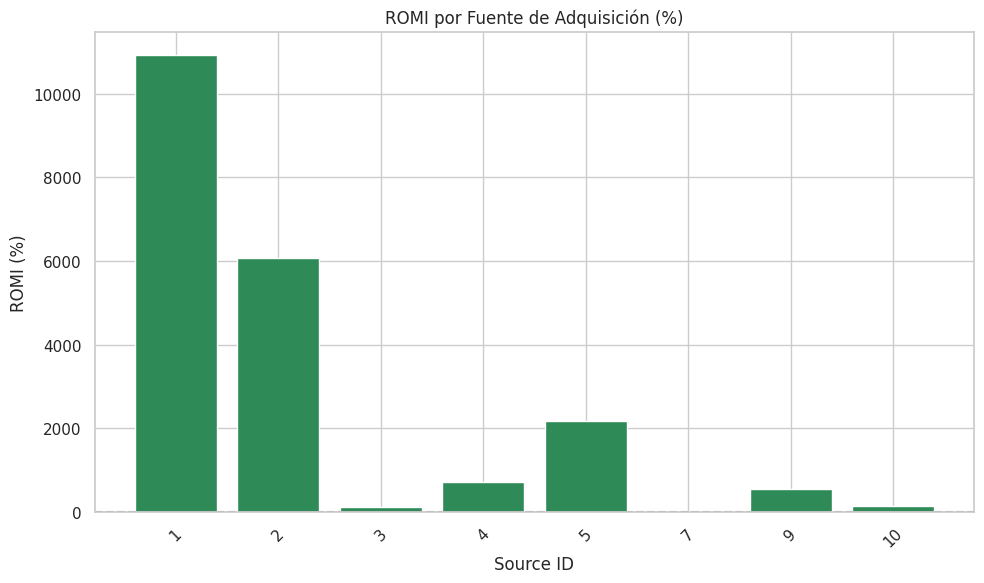

In [115]:
plt.figure(figsize=(10,6))
plt.bar(romi['source_id'].astype(str), romi['ROMI'], color='seagreen')
plt.axhline(0, color='gray', linestyle='--')
plt.title('ROMI por Fuente de Adquisición (%)')
plt.xlabel('Source ID')
plt.ylabel('ROMI (%)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<h1 style="font-size:20px;">Analisis de Marketing:</h1> 

Respecto al analisis de marketing se puede notar que respecto al Costo de adquisición por canal (CAC)la fuente  eficiente en términos de adquisición es la numero  9 con un 	cac de 1.97 y Fuente Menos eficiente es la numero 3 con un Cat de 10.21.

En cuanto a ROMI se puede concluir que lo mas recomendable es  invertir más en Fuente 1, 2 y 5, que es donde se encuentra la mayor fuente de adquisición  y reducir drásticamente el gasto en Fuente 3, dado su bajo ROMI y alto CAC.


 <h1 style="font-size:40px;">Conclusión general</h1>

¿Qué fuentes/plataformas recomendarías?  Fundamenta tu selección: ¿en qué métricas te enfocaste?  ¿Por qué? ¿Qué conclusiones sacaste después de encontrar los valores métricos?

Como conclusion final y despues de observar todos los datos analizados las principales recomendaciones para el area de Marketing son las siguientes son las siguientes:

-Priorizar la inversión en las fuentes más rentablesc como por ejemplo:

Source ID 1: Mayor ROMI (+10,931%) y CAC muy bajo (~$2.91).

Source ID 2 y Source ID 5: También presentan excelentes retornos con un CAC razonable.

-Redirigir al menos el 50% del presupuesto de Source ID 3 a Source ID 1 y 2.

-Mantener inversión moderada en Source ID 5 y explorar estrategias para mejorar el LTV en canales con buen CAC pero bajo ROMI.

-Enfocarse más en la conversión rápida ya que Más del 90% de los usuarios que convierten, lo hacen en los primeros 3 días de entrar al servidor de Showz.

-Lanzar Estrategias como remarketing inmediato y ofertas temporales en ese rango de tiempo pueden aumentar conversiones.

-Dado que los usuarios abandonan despues de los 4 minutos se puede mejorar las primeras interacciones, simplificar la compra, o personalizar eventos según su historial puede mejorar la conversión.

Los metodos en los que me base para hacer el analisis son el CAC para evaluar la eficiencia de cada fuente, LTV y tamaño de compra promedio para valorar el retorno por usuario, el ROMI para comparar directamente ingresos vs. inversión, y por ultimo los tiempos de conversión para entender el comportamiento de la compra.